# Visualising Convolution Neural Networks

## Import Libraries

In [23]:
# Import necessary Python libraries and functions

# Warnings library allows control over warnings in the program
import warnings
# Suppress warnings by ignoring them. This is useful to keep the output clean from non-critical warnings.
warnings.filterwarnings("ignore")
# PyTorch: The core library used for deep learning models and tensor operations
import torch
# Import the neural network module from PyTorch. Provides various layers, loss functions, etc., to build neural networks.
import torch.nn as nn
# torchvision contains utilities for computer vision tasks, such as pre-trained models and datasets
import torchvision.models as models
# torchvision.transforms is used to apply transformations to image data (e.g., resizing, normalizing) for data preprocessing
import torchvision.transforms as transforms
# matplotlib is a library used for plotting and visualizing data, especially useful for showing graphs or images
import matplotlib.pyplot as plt
# numpy is a library for numerical operations, especially for handling arrays, which are used to store and manipulate data
import numpy as np
# seaborn is built on top of matplotlib and provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# cv2 is OpenCV, a popular library for computer vision tasks like image processing, object detection, etc.
import cv2
# PIL (Python Imaging Library) provides easy-to-use functions for opening, manipulating, and saving image files
from PIL import Image

## Visualizing Filters/Kernels

In [24]:
# Load a pre-trained AlexNet model from torchvision.models
# AlexNet is a popular deep learning architecture used for image classification tasks.
# It was one of the first models to demonstrate the power of convolutional neural networks (CNNs) on large datasets (e.g., ImageNet).
# 'pretrained=True' loads a version of the model that has been pre-trained on the ImageNet dataset.
# This means the model has already learned useful features from 1.2 million labeled images across 1,000 different classes.
alexnet = models.alexnet(pretrained=True)

# Print the architecture of the AlexNet model to view its layers and structure.
# This helps understand the components and how data will flow through the network during inference or training.
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [25]:
# Function to plot RGB filters from a convolutional neural network (CNN)
# 't' is the filter tensor, which contains the weights of a convolutional layer.
# 'num_filters' specifies how many filters to display (default is 64).
def plot_filters_rgb(t, num_filters=64):
    
    # Normalize the filter values to a range between 0 and 1 for better visualization.
    # This is done because the raw filter weights may have values that are too high or low to visualize properly.
    t_min = t.min()  # Find the minimum value in the tensor
    t_max = t.max()  # Find the maximum value in the tensor
    t = (t - t_min) / (t_max - t_min)  # Normalize the tensor so that all values are between 0 and 1
    
    # Determine how many channels the filters have (typically 3 for RGB images or 1 for grayscale).
    num_channels = t.shape[1]
    
    # Create an 8x8 grid of subplots to display the filters.
    # The total number of subplots will be 64 (8x8) if num_filters is 64.
    fig, axarr = plt.subplots(8, 8, figsize=(12, 12))  # Each subplot is a 12x12 square grid
    
    # Loop through each filter up to the specified number (num_filters).
    for idx in range(num_filters):
        # Determine which subplot (position) to place the filter visualization in.
        # 'idx // 8' determines the row number and 'idx % 8' determines the column number in the 8x8 grid.
        ax = axarr[idx // 8, idx % 8] 
        
        # If the filter has 3 channels, treat it as an RGB image and plot it in color.
        if num_channels == 3:
            # Convert the filter tensor from shape (C, H, W) to (H, W, C).
            # This is necessary because matplotlib expects the channel dimension to be last, not first.
            img = t[idx].numpy().transpose(1, 2, 0)
            
            # Display the filter as an RGB image.
            ax.imshow(img)
        
        # If the filter is grayscale (only 1 channel), plot it in grayscale.
        else:
            img = t[idx, 0].numpy()  # Take the first (and only) channel for grayscale filters.
            
            # Display the filter as a grayscale image.
            ax.imshow(img, cmap="gray")
        
        # Turn off the axis for each subplot to keep the plot clean (no ticks or labels).
        ax.axis('off')
    
    # Display the full grid of filter images.
    plt.show()

# High-Level Overview:
# ---------------------
# - This function visualizes the learned filters (weights) from a convolutional neural network layer.
# - The function supports both RGB (3-channel) and grayscale (1-channel) filters.
# - It first normalizes the filter values to ensure they're in a range suitable for plotting.
# - Filters are arranged in an 8x8 grid, and the function uses matplotlib to display them.
# - For RGB filters, the three channels are shown as color images, while grayscale filters are displayed with a gray colormap.

Visualizing first 64 filters of AlexNet...


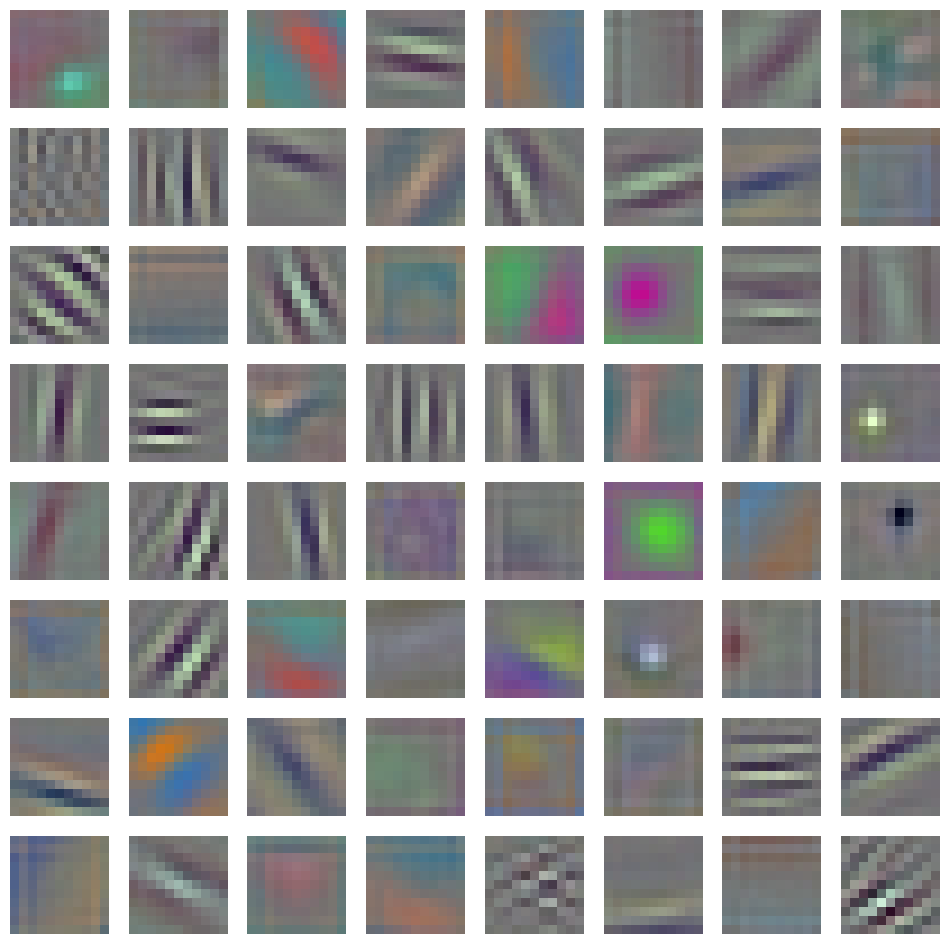

Visualizing first 64 filters of ResNet18...


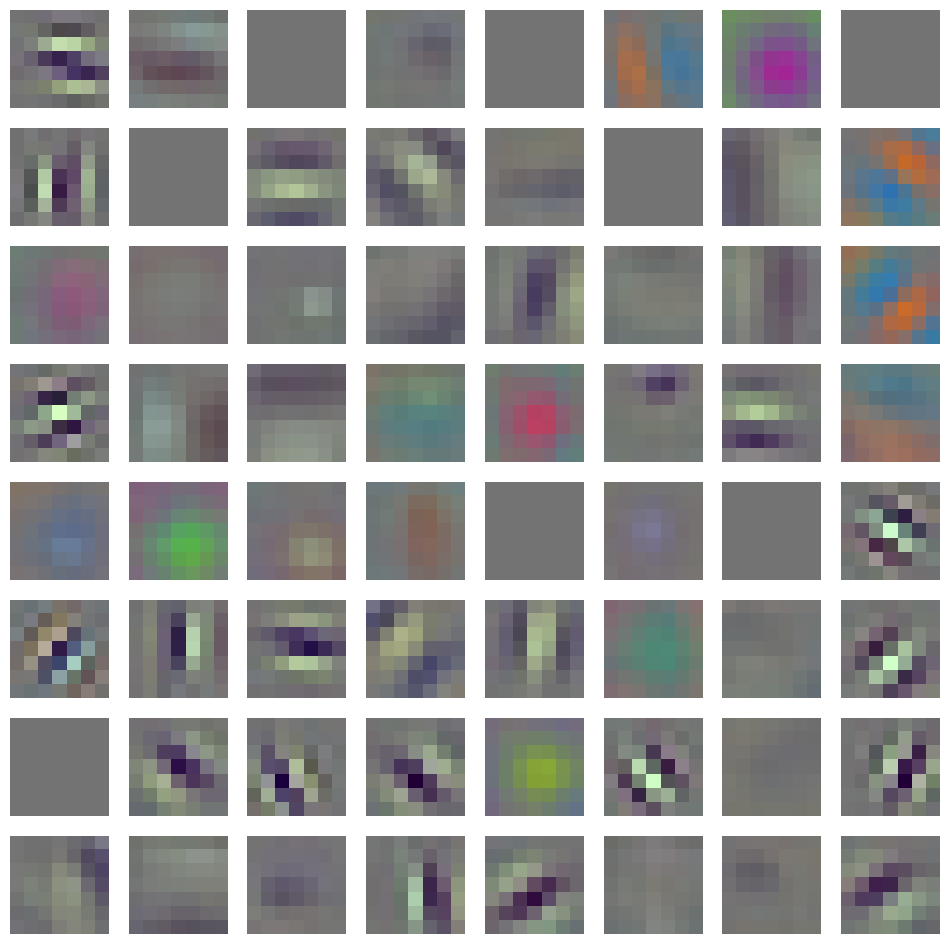

Visualizing first 64 filters of ResNet101...


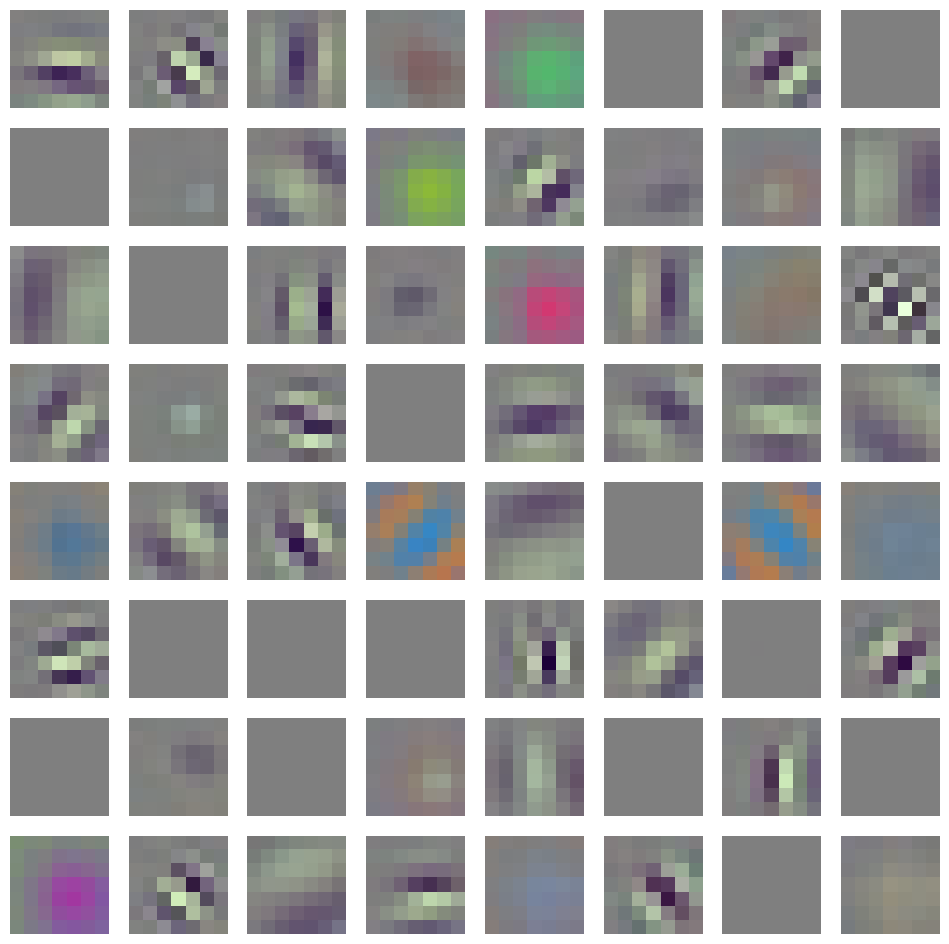

In [26]:
# Function to extract and visualize the filters from the first convolutional layer of a model
def visualize_first_layer(model, model_name):
    # Check which model is being passed and extract the first convolutional layer's filters.
    # Different models have different architectures, so we need to access the filters accordingly.
    
    # If the model is AlexNet, extract filters from the first layer of 'features' (which is a Conv2d layer)
    if isinstance(model, models.AlexNet):
        filters = model.features[0].weight.data  # First convolutional layer in AlexNet
    
    # If the model is ResNet (such as ResNet18 or ResNet101), extract filters from 'conv1', which is the first Conv2d layer
    elif isinstance(model, models.ResNet):
        filters = model.conv1.weight.data  # First convolutional layer in ResNet
    
    # If the model is DenseNet, extract filters from the first layer in the 'features' block
    elif isinstance(model, models.DenseNet):
        filters = model.features[0].weight.data  # First convolutional layer in DenseNet
    
    # Raise an error if the model type is unsupported
    else:
        raise ValueError("Unsupported model type")
    
    # Notify the user which model's filters are being visualized
    print(f"Visualizing first 64 filters of {model_name}...")
    
    # Call the function that plots the filters. Only the first 64 filters are visualized.
    plot_filters_rgb(filters, num_filters=64)

# Load pre-trained models
# Load a pre-trained version of AlexNet, ResNet18, and ResNet101 from torchvision
# These models have been trained on ImageNet and are commonly used for transfer learning.
resnet18 = models.resnet18(pretrained=True)  # Load ResNet18

# YOUR CODE # Load ResNet101, a deeper version of ResNet with 101 layers
resnet101 = models.resnet101(pretrained=True)

# Visualize filters from the first convolutional layer of AlexNet
visualize_first_layer(alexnet, "AlexNet")

# YOUR CODE # Visualize filters from the first layer of ResNet18 and ResNet101
visualize_first_layer(resnet18, "ResNet18")
visualize_first_layer(resnet101, "ResNet101")

# High-Level Overview:
# ---------------------
# - The `visualize_first_layer` function extracts the filters from the first convolutional layer
#   of either AlexNet, ResNet, or DenseNet models. It then calls the `plot_filters_rgb` function
#   to visualize the first 64 filters.
# - The pre-trained models are loaded using the torchvision library, which provides popular 
#   architectures trained on large datasets (like ImageNet).
# - The filters from the first layer capture low-level features such as edges, colors, and simple shapes.
# - Filters are visualized to provide insight into what the first layer of the CNN "sees" when processing input images.

In [27]:
# Load a pre-trained DenseNet121 model from torchvision.models
# DenseNet121 is a convolutional neural network architecture where each layer is connected to every other layer
# in a feed-forward fashion. This allows for efficient feature reuse and reduces the number of parameters.
# 'pretrained=True' loads a version of the model that has been trained on the ImageNet dataset.
densenet121 = models.densenet121(pretrained=True)

# Print the entire architecture of the DenseNet121 model
# This will display all the layers and their configurations, including:
# - Convolutional layers
# - Batch Normalization layers
# - Dense blocks (which contain multiple convolutional layers)
# - Transition layers (which reduce the dimensions of the feature maps)
# - Fully connected (linear) layers for classification
print(densenet121)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

Visualizing first 64 filters of DenseNet121...


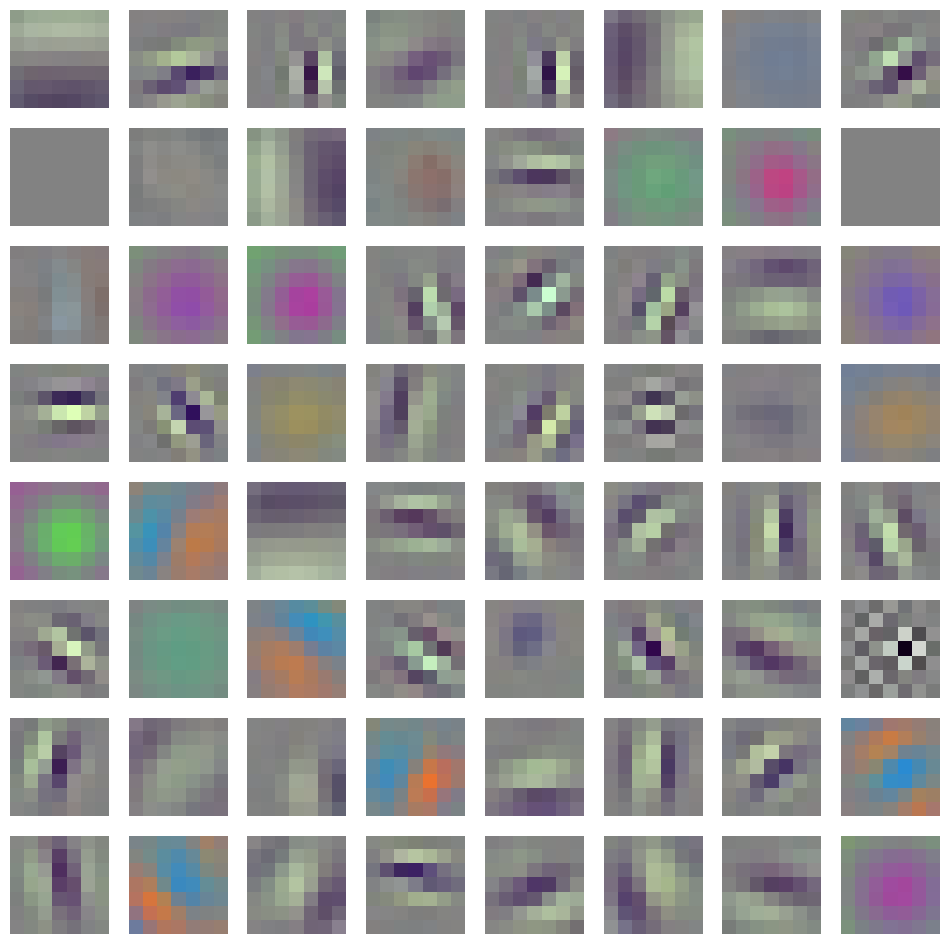

In [28]:
# Visualize filters from the first convolutional layer of DenseNet121
visualize_first_layer(densenet121, "DenseNet121")

Summary:   
Consistent First-Layer Filters Across Models:

* Training different models (e.g., AlexNet, ResNet18) on the same dataset (ImageNet) results in similar first-layer filters.

* These filters primarily learn low-level image processing features such as edges, textures, and simple patterns.

Divergence in Higher Layers:

* In the higher layers of the network, filters become more specialized and diverse.
* The vast variety of 1,000 objects in ImageNet leads to less similarity between higher-layer filters across different models.

Specialized Features with Focused Datasets:

* When models are trained on more focused datasets (e.g., human faces), higher-layer filters can capture more specific and detailed features.
* Examples of such specialized features include noise patterns, eye structures, and other intricate details relevant to the specific objects in the dataset.

Implications for Model Training:

* Understanding the behavior of filters at different layers can help in designing and fine-tuning models for specific tasks.
* Specialized datasets can enhance a model’s ability to recognize and process detailed features pertinent to the target domain

## Visualising Activation maps

In [29]:
# Load the pre-trained VGG19 model from torchvision
# VGG19 is a convolutional neural network with 19 layers. It is widely used for image classification tasks.
# 'pretrained=True' loads the model with weights pre-trained on the ImageNet dataset (1,000 object categories).
# 'model.eval()' puts the model in evaluation mode, which is important when you are not training the model.
# In evaluation mode, behaviors like dropout and batch normalization behave differently (they are fixed).
model = models.vgg19(pretrained=True)
model.eval()  # Set the model to evaluation mode since we are not training the model

# Define the transform to preprocess the input image
# We resize the image to (224, 224), which is the input size expected by VGG19.
# 'ToTensor()' converts the image to a PyTorch tensor, and 'Normalize()' scales the pixel values
# to match the normalization parameters of the pre-trained model (ImageNet's mean and std values).
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to 224x224 pixels
    transforms.ToTensor(),  # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Normalize using the mean of ImageNet dataset
                         std=[0.229, 0.224, 0.225])   # Normalize using the std of ImageNet dataset
])

# Define a function to load and preprocess an image
# This function handles image loading, resizing, normalization, and adding the batch dimension.
# It ensures that the input is compatible with the VGG19 model.
def preprocess_image(image_path):
    # Define the preprocessing steps: resizing, converting to tensor, and normalization
    preprocess = transforms.Compose([
        transforms.Resize((254, 254)),  # Resize image to 254x254 pixels (this will be resized further if needed)
        transforms.ToTensor(),  # Convert the image to a PyTorch tensor
        transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Mean for the ImageNet dataset
                             std=[0.229, 0.224, 0.225])   # Standard deviation for ImageNet dataset
    ])

    # Load the image from the given file path
    image = Image.open(image_path).convert('RGB')  # Open the image and convert to RGB format (3 channels)
    
    # Apply the preprocessing steps defined above to the image
    image = preprocess(image)
    
    # Add a batch dimension to the image (VGG19 expects inputs in batches of size [batch_size, 3, 224, 224])
    # 'unsqueeze(0)' adds a dimension at position 0 (batch dimension)
    image = image.unsqueeze(0)
    
    return image

# Load and preprocess the input image
# Replace 'image_path' with the actual path to your image.
# This path will be used for all experiments.
# Make sure the image is located at the specified location before running the script.

# YOUR CODE: Add your image path below
image_path = "./faces/face.jpg"  # Path to the input image you want to experiment with

# Preprocess the input image using the function defined above
# This image will now be ready for input into the VGG19 model.
input_image = preprocess_image(image_path=image_path)

# High-Level Overview:
# ---------------------
# - The VGG19 model is loaded with pre-trained weights from ImageNet, and we set it to evaluation mode.
# - We define a transform to resize the input image to 224x224 (the expected size), convert it to a tensor,
#   and normalize it using the mean and std values from the ImageNet dataset.
# - The 'preprocess_image' function loads an image from the specified path, preprocesses it by resizing, 
#   converting to tensor, and normalizing it. It also adds a batch dimension (since models expect inputs in batches).
# - The preprocessed image is then ready to be used for further experiments such as feature extraction, classification, etc.

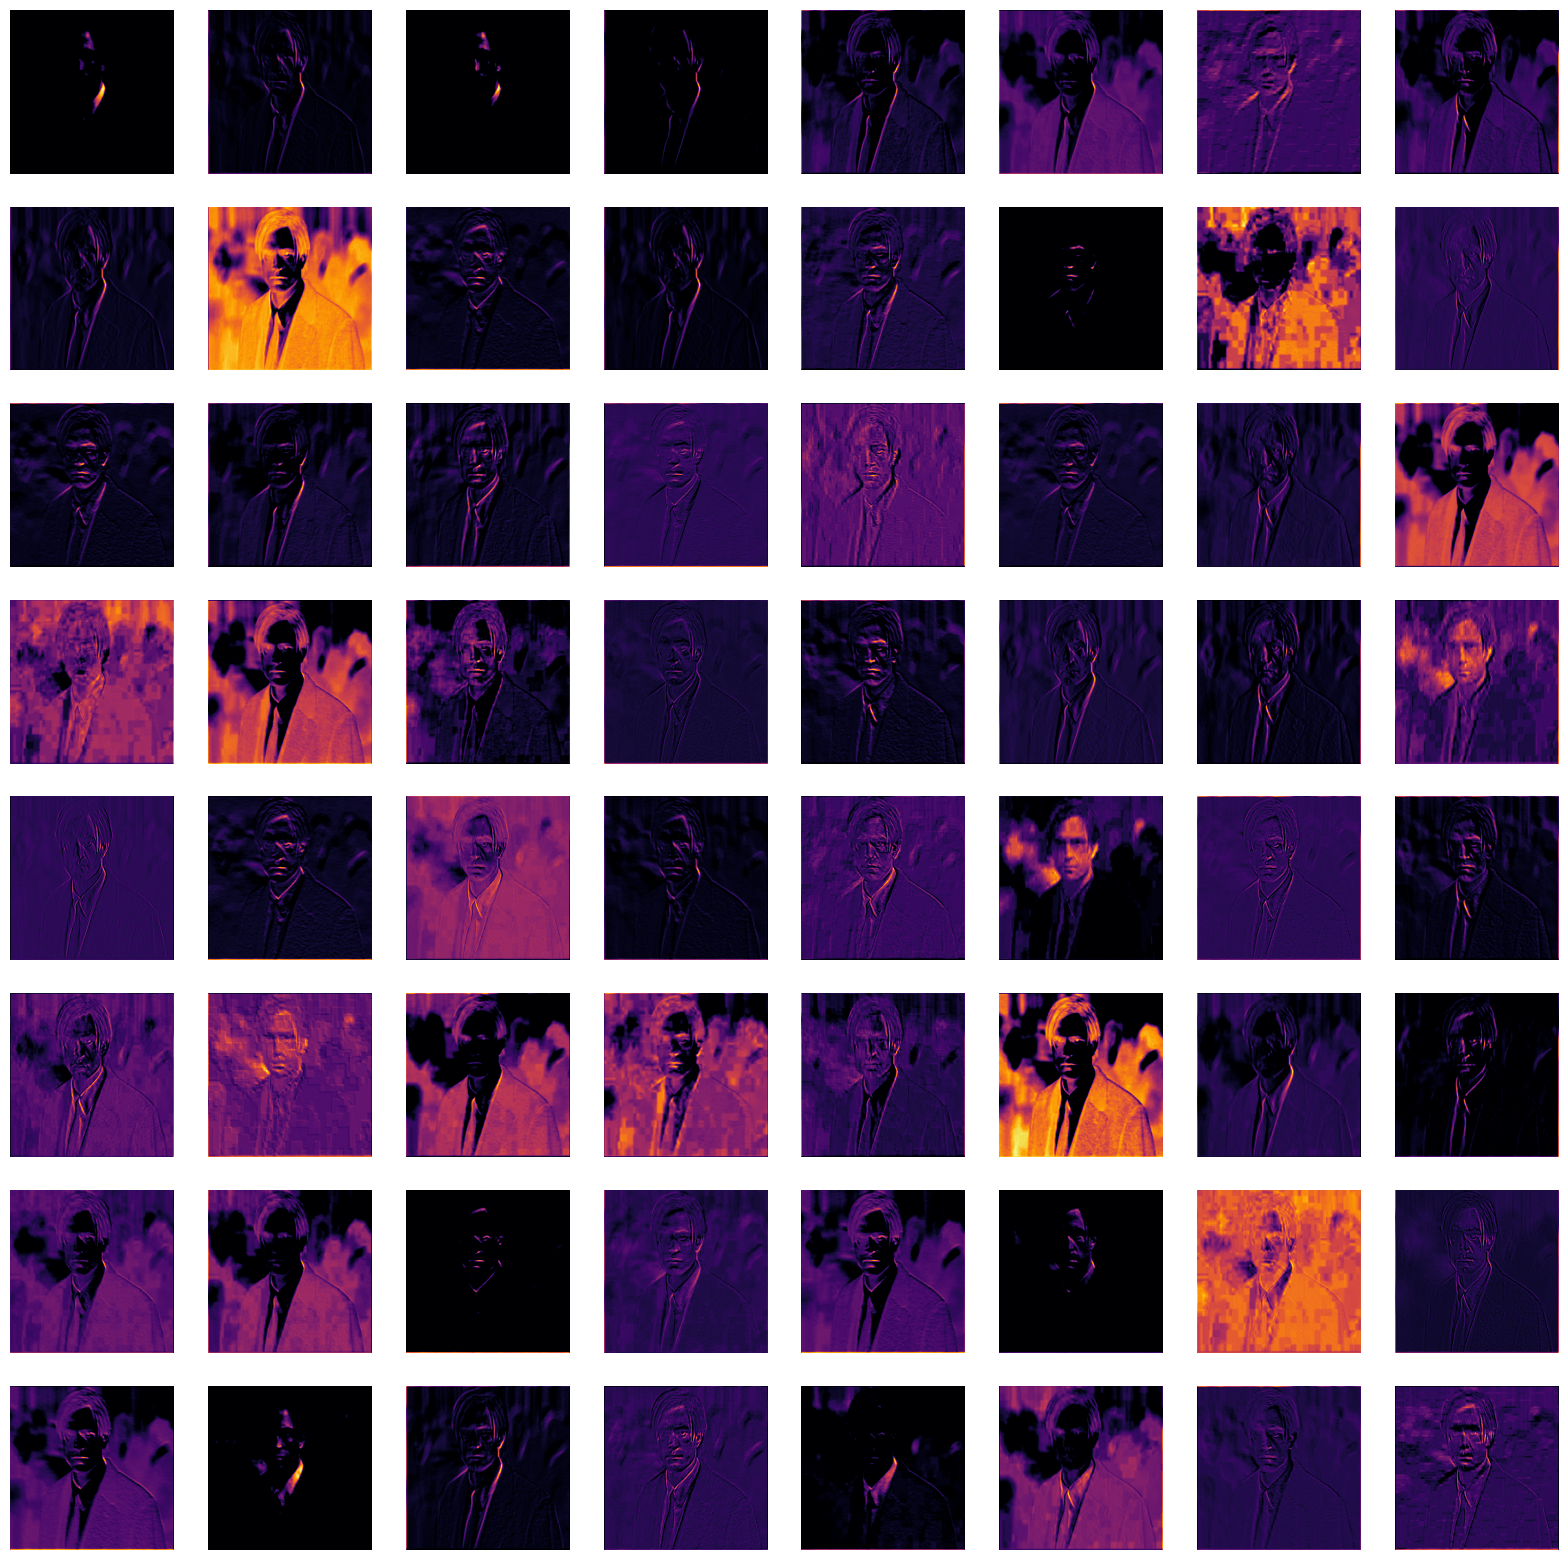

In [30]:
# Define a hook function to capture activations
# This function will be called during the forward pass of the model and will save the output of the specified layer.
def hook_fn(module, input, output):
    activations.append(output)  # Append the output (activations) to the global list 'activations'

# List to store the activation maps (outputs from the convolutional layers)
activations = []

# Register hooks to capture activations from all convolutional layers
# Hooks allow us to "listen" to the data flowing through the network without altering the architecture.
hooks = []
for name, module in model.named_modules():
    # Check if the module is a convolutional layer (Conv2d)
    if isinstance(module, torch.nn.Conv2d):
        # Register a forward hook to capture the activations of this layer
        hook = module.register_forward_hook(hook_fn)
        hooks.append(hook)  # Store the hook so we can remove it later

# Perform a forward pass through the network with the input image
# 'torch.no_grad()' ensures that gradients are not calculated (since we are only interested in inference, not training)
with torch.no_grad():
    _ = model(input_image)  # Forward pass, but we don't need the final output. Activations will be captured by the hook.

# Remove all hooks after the forward pass
# This is necessary to avoid accumulating hooks and capturing unwanted activations in future forward passes.
for hook in hooks:
    hook.remove()

# Define a function to visualize the activation maps (outputs of convolutional layers)
# 'activation_maps' is a list of activations from different layers
# 'num_columns' specifies how many filter activations to display in each row (8 filters per row by default)
def visualize_activations(activation_maps, num_columns=8):
    num_layers = len(activation_maps)  # Number of layers (activation maps) to visualize
    
    # Loop over each layer's activation map
    for i in range(num_layers):
        activation = activation_maps[i]  # Activation map of the i-th layer
        num_filters = activation.size(1)  # Number of filters (channels) in this activation map
        
        # Calculate how many rows are needed based on the number of filters
        num_rows = (num_filters + num_columns - 1) // num_columns  # Round up to the nearest row
        
        # Create a grid of subplots with 'num_rows' rows and 'num_columns' columns
        fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 20))
        axes = axes.flatten()  # Flatten the 2D array of axes to make indexing easier
        
        # Loop through each filter in the activation map
        for j in range(num_filters):
            # Extract the activation map for the j-th filter from the i-th layer
            # 'activation[0, j]' extracts the filter's activation map (ignores the batch dimension)
            img = activation[0, j].numpy()  # Convert the PyTorch tensor to a NumPy array for visualization
            
            # Display the activation map using a colormap (e.g., 'inferno')
            axes[j].imshow(img, cmap='inferno')  # Display the activation map in the j-th subplot
            axes[j].axis('off')  # Turn off the axis for cleaner visualization
        
        # Turn off any remaining unused axes
        for k in range(num_filters, len(axes)):
            axes[k].axis('off')  # Disable the unused axes
        
        # Display the activation maps for the current layer
        plt.show()

# Visualize activation maps from the first convolutional layer
# 'activations[:1]' extracts only the first layer's activations (since activations of all layers were captured)
visualize_activations(activations[:1])

# High-Level Overview:
# ---------------------
# - A hook function (`hook_fn`) is defined to capture the output (activations) of specific layers during the forward pass.
# - Hooks are registered on all convolutional layers (Conv2d) in the VGG19 model to capture their activations.
# - After a forward pass with the input image, the captured activations are stored in a list called 'activations'.
# - The function `visualize_activations` is used to plot the activation maps for each layer. It displays the activations
#   for all filters in a grid of subplots using a specified colormap (e.g., 'inferno').
# - Finally, the activations from the first convolutional layer are visualized. These maps show the features learned

## Class Activation Map(CAM)

### Experiment 1: Occlusion Experiments

To see how the model makes predictions, we can perform an occlusion experiment. In this experiment, we slide a window across the image and measure the change in the model's output. If the model's output changes significantly when a part of the image is occluded, it means that the occluded part is important for the model's prediction.

In [32]:
# Running inference on the input image without occlusion using the pre-trained VGG19 model

# Forward pass: Compute the output of the model for the input image
# The input image must have gone through the preprocessing steps earlier.
# This step provides raw class scores (logits) as output from the final fully connected layer of the VGG19 model.
outputs = model(input_image)

# The output will have the shape [batch_size, num_classes], where:
# - batch_size is 1 (since we are passing a single image).
# - num_classes is 1000 (VGG19 is trained on ImageNet, which has 1000 classes).
print(outputs.shape)  # The expected shape is [1, 1000]

# Pass the outputs through a softmax function to convert raw class scores (logits) into probabilities.
# Softmax normalizes the outputs so that they sum up to 1 and can be interpreted as probabilities.
outputs = nn.functional.softmax(outputs, dim=1)

# Get the maximum predicted class label (index) and its associated probability.
# 'torch.max' returns the maximum value and its index for each input in the batch.
# We use '.data' to extract the actual tensor data (without gradients) from the result.
# 'dim=1' indicates that we want to find the maximum along the class dimension (i.e., across all 1000 class scores).
prob_no_occ, pred = torch.max(outputs.data, 1)

# Extract the probability of the predicted class from the tensor (it's a single element tensor).
# '.item()' converts the PyTorch tensor to a Python float.
prob_no_occ = prob_no_occ[0].item()

# Print the predicted probability for the top predicted class (without occlusion).
print(prob_no_occ)

# High-Level Overview:
# ---------------------
# - The VGG19 model is used to run inference on the preprocessed input image.
# - The output of the model is a vector of raw class scores (logits) for each of the 1000 ImageNet categories.
# - We pass the logits through a softmax function to convert them into probabilities.
# - The 'torch.max' function extracts the predicted class (index of the class with the highest probability)
#   and the associated probability value.
# - 'prob_no_occ' holds the probability of the most confident class prediction, which is printed out at the end.

torch.Size([1, 1000])
0.08593429625034332


In [33]:
# Custom function to conduct occlusion experiments
def occlusion(model, image, label, occ_size=50, occ_stride=50, occ_pixel=0.5):
    """
    Conducts occlusion experiments on an input image to analyze the impact of occluding parts of the image
    on the model's prediction for a specific class label.

    Parameters:
    - model: The neural network model used for inference (e.g., VGG19).
    - image: The input image tensor for which occlusion is to be tested (shape: [1, 3, H, W]).
    - label: The target class label (index) for which we want to analyze occlusion effects.
    - occ_size: The size of the square occlusion (in pixels).
    - occ_stride: The stride (in pixels) to move the occlusion across the image.
    - occ_pixel: The pixel value to use for occlusion (e.g., 0.5 for a gray color).

    Returns:
    - heatmap: A 2D tensor representing the probability of the specified class label for each position of the occlusion.
    """

    # Get the width and height of the image from its shape
    width, height = image.shape[-2], image.shape[-1]

    # Setting the output image dimensions for the heatmap
    output_height = int(np.ceil((height - occ_size) / occ_stride))  # Number of rows for heatmap
    output_width = int(np.ceil((width - occ_size) / occ_stride))    # Number of columns for heatmap

    # Create a heatmap initialized to zeros with the calculated dimensions
    heatmap = torch.zeros((output_height, output_width))

    # Iterate over all possible positions to place the occlusion in the image
    for h in range(output_height):  # Loop over the height of the heatmap
        for w in range(output_width):  # Loop over the width of the heatmap

            # Calculate the starting and ending indices for the occlusion square
            h_start = h * occ_stride  # Starting height index
            w_start = w * occ_stride  # Starting width index
            h_end = h_start + occ_size  # Ending height index
            w_end = w_start + occ_size  # Ending width index

            # Check if the occlusion window is out of bounds of the image
            if (w_end) >= width or (h_end) >= height:
                continue  # Skip this position if the occlusion exceeds the image boundaries
            
            # Clone the input image tensor to avoid modifying the original
            input_image = image.clone().detach()

            # Replace pixel values in the specified occlusion region with 'occ_pixel' (gray color)
            input_image[:, :, h_start:h_end, w_start:w_end] = occ_pixel

            # Run inference on the modified image with the occlusion
            output = model(input_image)  # Get the model's predictions for the occluded image
            output = nn.functional.softmax(output, dim=1)  # Convert logits to probabilities

            # Get the probability of the target class label from the output
            prob = output.tolist()[0][label]

            # Set the corresponding position in the heatmap to the probability value
            heatmap[h, w] = prob  # Store the probability of the specified class label

    return heatmap  # Return the heatmap containing probabilities for each occluded position

# High-Level Overview:
# ---------------------
# - This function performs occlusion experiments on an input image to assess how occluding different
#   parts of the image affects the model's prediction for a specific class.
# - The occlusion is a square region defined by 'occ_size' that slides across the image with a given stride.
# - For each position of the occlusion, the function computes the model's prediction and stores the probability
#   of the specified class label in the heatmap.
# - The resulting heatmap represents the sensitivity of the model's predictions to occlusion in different regions
#   of the image.

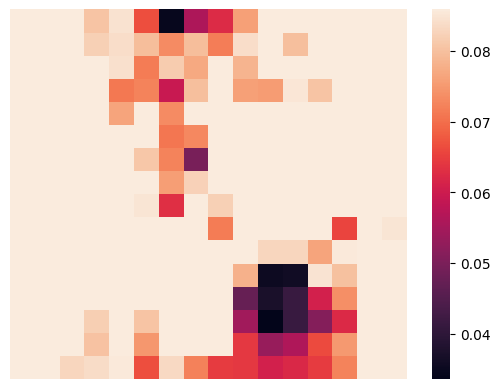

In [34]:
# Conduct the occlusion experiment on the input image
# The function call occludes the specified class label area of the image to analyze the effect on model predictions.
# - model: The pre-trained VGG19 model.
# - input_image: The input image tensor that was preprocessed.
# - pred[0].item(): The predicted class label from the previous inference step, converted to a Python integer.
# - 32: The size of the occlusion square (32 pixels).
# - 14: The stride (14 pixels) for moving the occlusion across the image.
heatmap = occlusion(model, input_image, pred[0].item(), 32, 14)

# Displaying the heatmap using seaborn
# - sns.heatmap: Creates a heatmap visualization of the occlusion results.
# - xticklabels=False and yticklabels=False: Disables the axis tick labels for a cleaner display.
# - vmax=prob_no_occ: Sets the maximum value of the color gradient to the probability of the original image
#   (before occlusion) for better visual contrast.
imgplot = sns.heatmap(heatmap, xticklabels=False, yticklabels=False, vmax=prob_no_occ)

# Save the generated heatmap figure to a file named 'svm_conf.png' with a specified DPI for high resolution.
figure = imgplot.get_figure()  # Get the figure object from the heatmap plot.
figure.savefig('svm_conf.png', dpi=400)  # Save the figure with a DPI of 400 for better quality.

#### Display Occluded Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the 

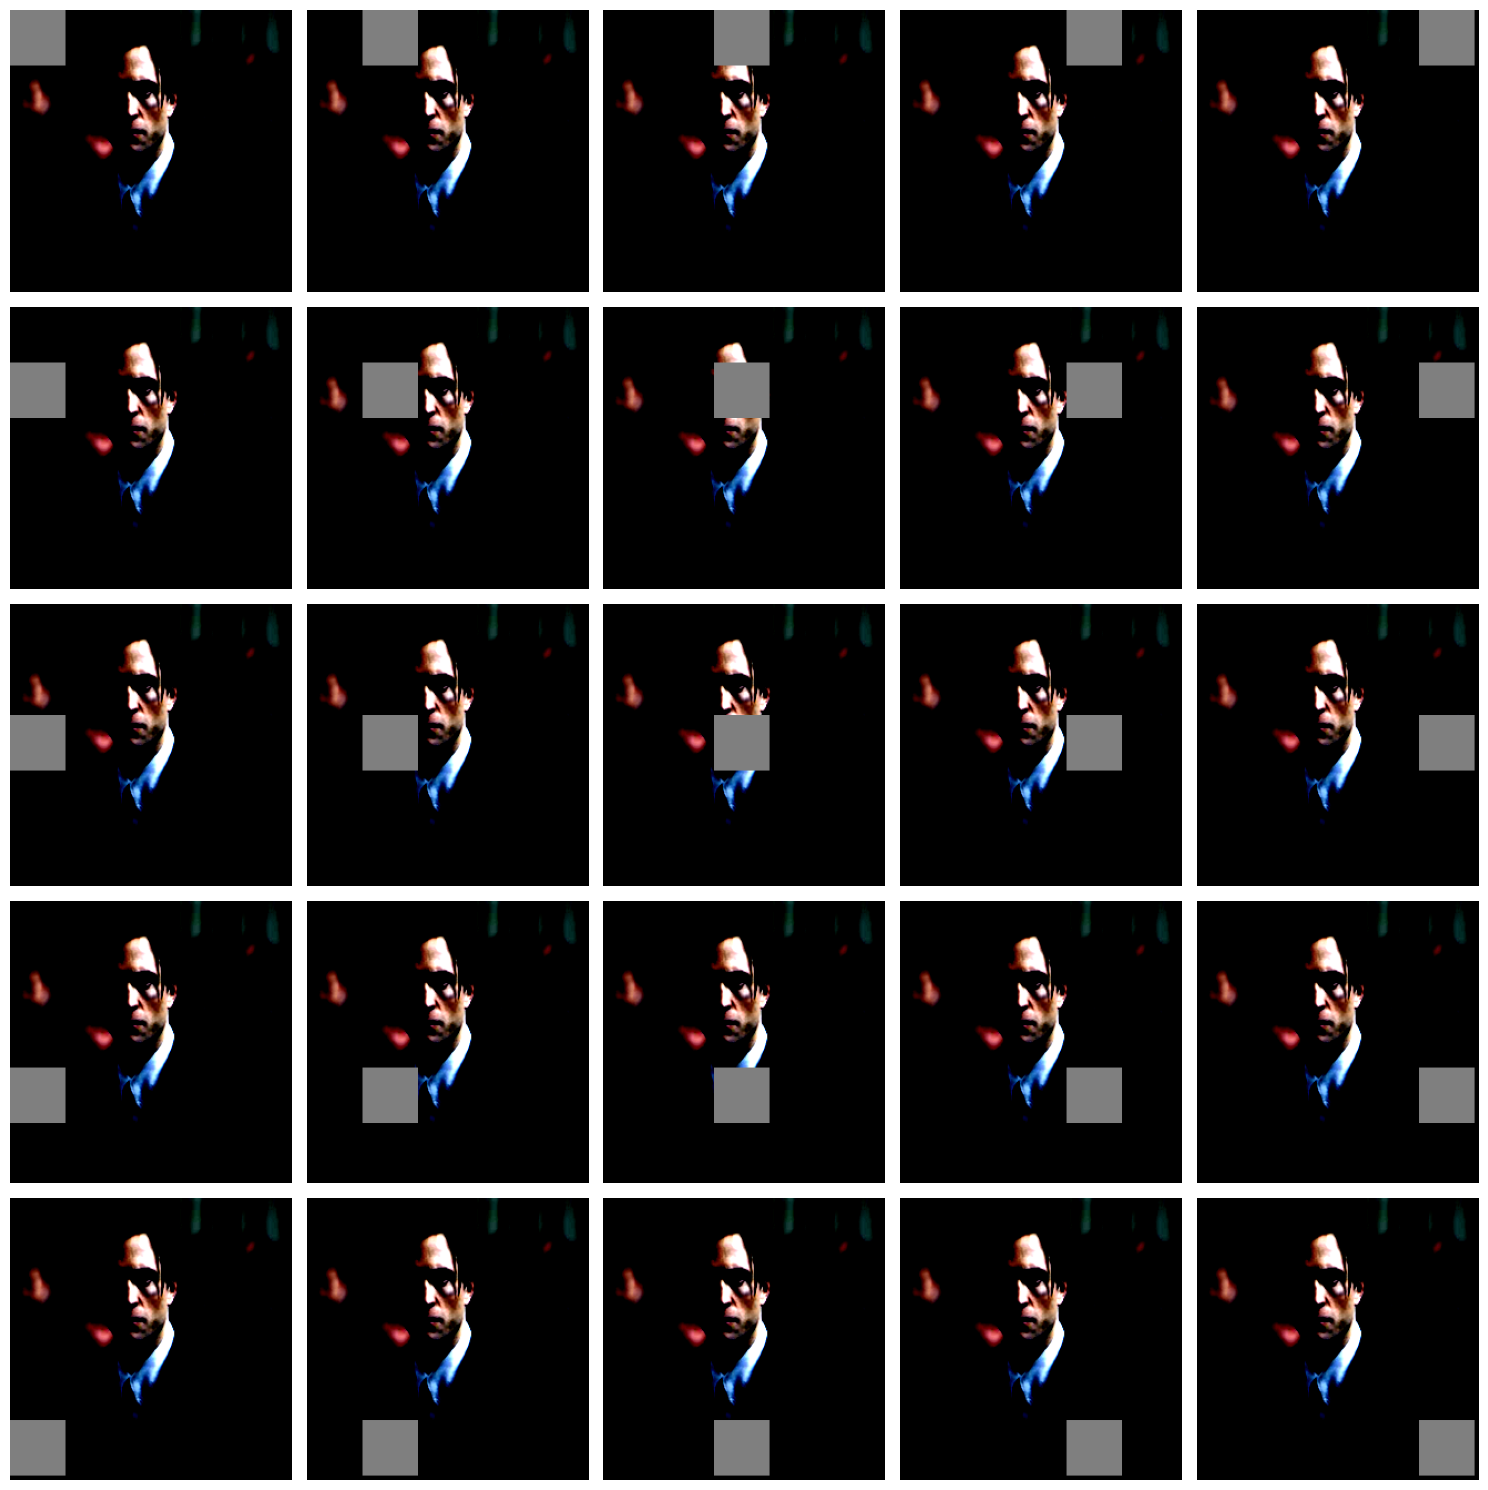

In [38]:
def display_occluded_image(image, occ_size=50, occ_stride=50, occ_pixel=0.5):
    """
    Displays the input image with occlusions applied at different positions to visualize the effect of occlusion.

    Parameters:
    - image: The input image tensor (shape: [1, 3, H, W]).
    - occ_size: The size of the square occlusion (in pixels).
    - occ_stride: The stride (in pixels) for moving the occlusion across the image.
    - occ_pixel: The pixel value to use for occlusion (e.g., 0.5 for gray color).
    """

    # Get the width and height of the image from its shape
    width, height = image.shape[-2], image.shape[-1]

    # Calculate the dimensions of the output grid for the subplots
    output_height = int(np.ceil((height - occ_size) / occ_stride))  # Number of rows for subplots
    output_width = int(np.ceil((width - occ_size) / occ_stride))    # Number of columns for subplots

    # Initialize a figure with subplots for displaying the occluded images
    fig, axes = plt.subplots(output_height, output_width, figsize=(15, 15))

    # Iterate over the entire height and width of the original image to apply occlusion
    for h in range(0, height):
        for w in range(0, width):

            # Calculate the start and end coordinates for the occlusion square
            h_start = h * occ_stride  # Starting height index
            w_start = w * occ_stride  # Starting width index
            h_end = h_start + occ_size  # Ending height index
            w_end = w_start + occ_size  # Ending width index

            # Check if the occlusion square exceeds the image boundaries
            if (w_end) >= width or (h_end) >= height:
                continue  # Skip this position if the occlusion is out of bounds

            # Clone the input image tensor to avoid modifying the original
            input_image = image.clone().detach()

            # Replace pixel values in the specified occlusion region with 'occ_pixel' (gray color)
            input_image[:, :, h_start:h_end, w_start:w_end] = occ_pixel

            # Display the modified image in the corresponding subplot
            ax = axes[h, w]  # Access the current subplot
            ax.imshow(input_image[0].permute(1, 2, 0).numpy())  # Convert the tensor to a numpy array for display
            ax.axis('off')  # Hide the axis for better visualization

    plt.tight_layout()  # Adjust subplots to fit into the figure area
    plt.show()  # Display the figure with all subplots

# Load and preprocess the image
image_path = "./faces/face.jpg"  # Path to the input image
input_image = preprocess_image(image_path=image_path)  # Preprocess the image for the model

# Call the function to display the occluded images
display_occluded_image(input_image)  # Visualize the occluded versions of the input image

### Experiment 2 : GRADCAM

To see which parts of the image are important for the model's prediction, we can use the Gradient-weighted Class Activation Mapping (Grad-CAM) technique. This technique highlights the regions of the image that are important for the model's prediction by visualizing the gradients of the predicted class with respect to the feature maps of the last convolutional layer. 

In [40]:
def visualize_gradcam(model, image):
    """
    Visualizes the Grad-CAM heatmap for a given image using a specified model.

    Parameters:
    - model: The pre-trained model used for inference.
    - image: The input image tensor (shape: [1, 3, H, W]).
    """
    
    # Forward pass through the model to get predictions
    pred = model(image)  # Perform inference
    index = pred.argmax(dim=1).item()  # Get the index of the predicted class
    print("The max probability is of class", index)  # Print the predicted class index
    
    # Backward pass to compute gradients for the predicted class
    pred[:, index].backward()  # Backpropagate to get the gradients

    # Get the gradient of the output with respect to the model parameters
    gradients = model.get_activations_gradient()  # Custom function to retrieve gradients
    print(gradients.shape)  # Print the shape of gradients for debugging

    # Pool the gradients across the channels (mean of gradients)
    pooled_gradients = torch.mean(gradients, dim=[0, 2, 3])
    
    # Get the activations of the last convolutional layer
    activations = model.get_activations(image).detach()  # Custom function to retrieve activations

    # Weight the channels of the activations by the corresponding pooled gradients
    for i in range(activations.shape[1]):
        activations[:, i, :, :] *= pooled_gradients[i]  # Scale activations by gradients

    # Average the weighted activations to produce the final heatmap
    heatmap = torch.mean(activations, dim=1).squeeze()  # Average across channels
    heatmap = np.maximum(heatmap.cpu(), 0)  # Apply ReLU to remove negative values
    
    # Normalize the heatmap to range [0, 1]
    heatmap /= torch.max(heatmap)  # Normalize the heatmap
    plt.matshow(heatmap.squeeze())  # Display the heatmap for debugging

    heatmap = heatmap.numpy()  # Convert heatmap to numpy array for further processing

    # Read the original image for overlaying the heatmap
    img = cv2.imread('./faces/face.jpg')  # Load the original image
    if img is None:
        raise Exception("Could not read the image")  # Error handling for image loading

    # Resize the heatmap to match the dimensions of the original image
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)  # Scale heatmap to [0, 255]

    # Apply a colormap (JET) to the heatmap for better visualization
    heatmap_colored = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Overlay the heatmap on the original image
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap_colored, 0.4, 0)

    # Convert BGR (OpenCV format) to RGB (Matplotlib format)
    superimposed_img_rgb = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)

    # Display the superimposed image using Matplotlib for better visualization
    plt.figure(figsize=(10, 8))  # Set the figure size
    plt.imshow(superimposed_img_rgb)  # Display the image with the heatmap overlay
    plt.axis('off')  # Turn off the axis for a cleaner look
    plt.title('Heatmap Overlay')  # Title for the displayed image
    plt.show()  # Render the plot

In [41]:
class VGG(nn.Module):
    def __init__(self):
        """
        Initializes the VGG class by loading the pretrained VGG19 model.
        It prepares the architecture for feature extraction and classification.

        - features_conv: Extracts the convolutional layers up to the 36th layer.
        - max_pool: Defines a max pooling layer to downsample feature maps.
        - classifier: Retains the classification layers from the original model.
        - gradients: Placeholder for storing gradients during backpropagation.
        """
        super(VGG, self).__init__()
        
        # Load the pretrained VGG19 model
        self.vgg = models.vgg19(pretrained=True)
        
        # Dissect the network to access its last convolutional layer
        self.features_conv = self.vgg.features[:36]  # Keep up to the 36th layer
        
        # Define a max pooling layer to downsample feature maps
        self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        
        # Get the classifier part of VGG19
        self.classifier = self.vgg.classifier
        
        # Placeholder for storing gradients from the last convolutional layer
        self.gradients = None
    
    def activations_hook(self, grad):
        """
        Hook function to capture gradients of the activations.

        Parameters:
        - grad: The gradient of the output with respect to the activations.
        """
        # Store the gradients in the gradients attribute
        self.gradients = grad

    def forward(self, x):
        """
        Forward pass through the network. It processes the input tensor through
        the convolutional layers, applies pooling, and passes it to the classifier.

        Parameters:
        - x: Input tensor of shape [batch_size, channels, height, width]

        Returns:
        - x: Output tensor after passing through the classifier.
        """
        # Pass the input through the convolutional layers
        x = self.features_conv(x)
        
        # Register the hook to capture gradients from the activations
        h = x.register_hook(self.activations_hook)
        
        # Apply max pooling to the feature maps
        x = self.max_pool(x)
        
        # Flatten the tensor for the classifier
        x = x.view((1, -1))  # Reshape for the classifier
        
        # Pass through the classifier to get predictions
        x = self.classifier(x)
        return x
    
    def get_activations_gradient(self):
        """
        Returns the stored gradients from the last convolutional layer.

        Returns:
        - gradients: Gradients captured during backpropagation.
        """
        return self.gradients
    
    def get_activations(self, x):
        """
        Extracts activations from the convolutional layers of the network.

        Parameters:
        - x: Input tensor of shape [batch_size, channels, height, width]

        Returns:
        - activations: Output tensor after passing through the convolutional layers.
        """
        return self.features_conv(x)

In [42]:
# Initialize the VGG model by creating an instance of the VGG class
vgg = VGG()

# Set the model to evaluation mode
# This is essential for models that use layers like dropout or batch normalization, as it ensures that these layers function in inference mode.
vgg.eval()

# Get the most likely prediction of the model for the input image
# The model processes the input image and outputs logits (raw scores) for each class.
# We use `argmax` to get the index of the class with the highest score, indicating the model's predicted class.
pred = vgg(input_image).argmax(dim=1)

The max probability is of class 834
torch.Size([1, 512, 15, 15])


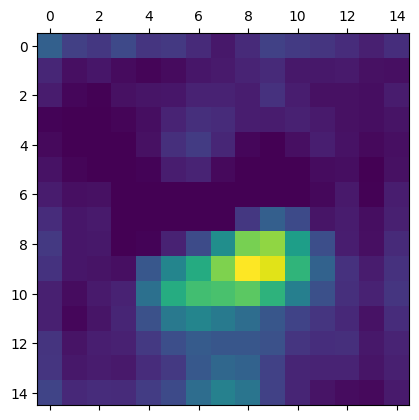

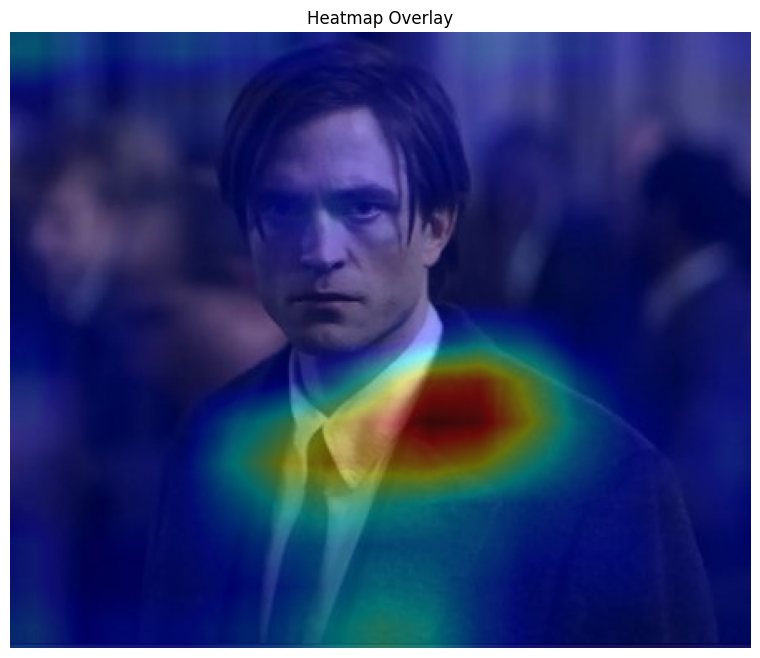

In [43]:
visualize_gradcam(vgg, input_image)

## Additional Visualisation Techniques


* Visualise Representation Space
* Visualise Maximally Activating Image Patches(Dropout)